In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('virus.csv',parse_dates=["Date"])

In [4]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


In [6]:
df.isnull()

,Date,Country,Confirmed,Recovered,Deaths
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
23683,False,False,False,False,False
23684,False,False,False,False,False
23685,False,False,False,False,False
23686,False,False,False,False,False


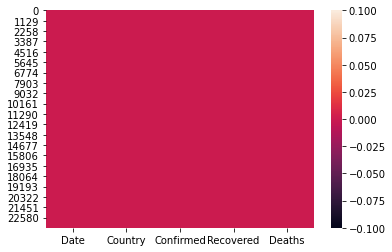

In [7]:
#no null value present
sns.heatmap(df.isnull())

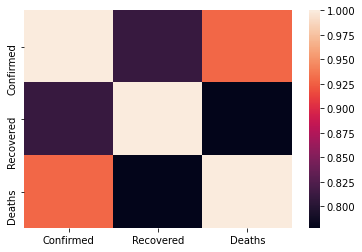

In [8]:
dfcor=df.corr()
sns.heatmap(dfcor)

In [9]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


Confirmed       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Recovered    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Deaths       AxesSubplot(0.672059,0.536818;0.227941x0.343182)
dtype: object

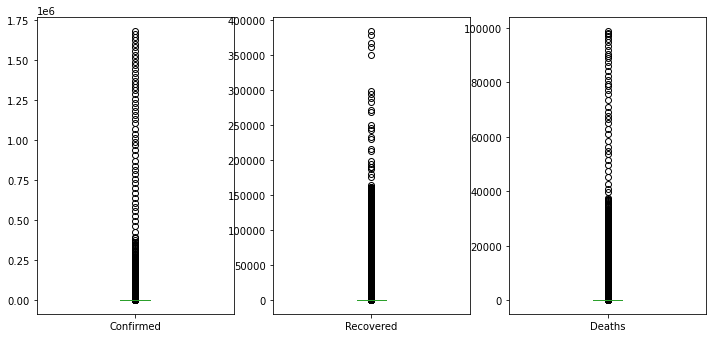

In [10]:
df.plot(kind='box',subplots=True,layout=(2,3),figsize=(12,12))

In [11]:
df['Date'].dt.year

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
23683    2020
23684    2020
23685    2020
23686    2020
23687    2020
Name: Date, Length: 23688, dtype: int64

In [12]:
df['Date'].dt.month

0        1
1        1
2        1
3        1
4        1
        ..
23683    5
23684    5
23685    5
23686    5
23687    5
Name: Date, Length: 23688, dtype: int64

In [13]:
df['Date'].dt.day

0        22
1        22
2        22
3        22
4        22
         ..
23683    26
23684    26
23685    26
23686    26
23687    26
Name: Date, Length: 23688, dtype: int64

In [14]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [15]:
df

,Date,Country,Confirmed,Recovered,Deaths,Year,Month,Day
0,2020-01-22,Afghanistan,0,0,0,2020,1,22
1,2020-01-22,Albania,0,0,0,2020,1,22
2,2020-01-22,Algeria,0,0,0,2020,1,22
3,2020-01-22,Andorra,0,0,0,2020,1,22
4,2020-01-22,Angola,0,0,0,2020,1,22
...,...,...,...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3,2020,5,26
23684,2020-05-26,Western Sahara,9,6,1,2020,5,26
23685,2020-05-26,Yemen,249,10,49,2020,5,26
23686,2020-05-26,Zambia,920,336,7,2020,5,26


In [18]:
df1=df.drop(['Date','Country'],axis=1)

In [21]:
df2=df1.drop(['Year','Month','Day'],axis=1)

In [22]:
df2

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


In [23]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
threshold=3
print(np.where(z>3))
df_new=df2[(z<3).all(axis=1)]
df_new

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


In [24]:
df1.shape

(23688, 6)

In [25]:
df2.shape

(23688, 3)

In [26]:
df_new.shape

(23177, 3)

In [27]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
Year                  int64
Month                 int64
Day                   int64
dtype: object

In [28]:
df1.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
Year          0.000000
Month        -0.107605
Day          -0.068932
dtype: float64

In [32]:
# remove skewness
import numpy as np
from sklearn.preprocessing import power_transform
pt=power_transform(df1,method='yeo-johnson')
new=pd.DataFrame(pt,columns=df1.columns)

In [34]:
new.skew()

Confirmed    0.178414
Recovered    0.412470
Deaths       0.617985
Year         0.000000
Month       -0.112722
Day         -0.234208
dtype: float64

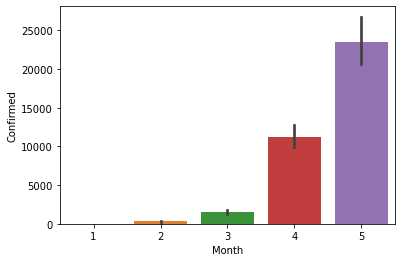

In [35]:
sns.barplot(x="Month",y="Confirmed",data=df)

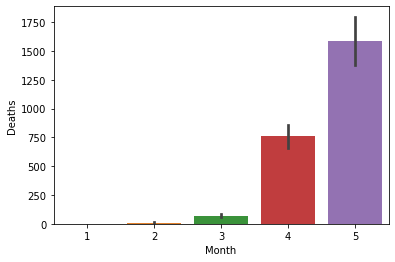

In [36]:
sns.barplot(x="Month",y="Deaths",data=df)

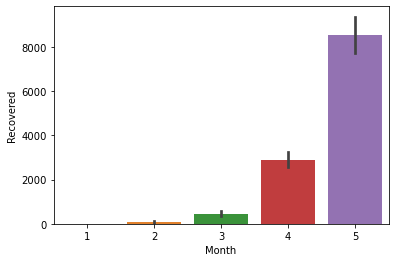

In [37]:
sns.barplot(x="Month",y="Recovered",data=df)

In [38]:
x=df.iloc[ :,2:4]
x

,Confirmed,Recovered
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
23683,429,365
23684,9,6
23685,249,10
23686,920,336


In [39]:
y=df.iloc[ :,4]
y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23688, dtype: int64

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [41]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [42]:
lm.coef_

array([0.0591315 , 0.02049146])

In [43]:
lm.intercept_

-3.429449921866137

In [44]:
lm.score(x_train,y_train)

0.8564762865924169

In [45]:
pred=lm.predict(x_test)

In [46]:
print("predict result",pred)

predict result [-3.42944992 -3.19292393 -3.42944992 ... -3.31118692 52.17234244
 -3.42944992]


In [47]:
print('mean abs error',mean_absolute_error(y_test,pred))
print('mean square error',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

mean abs error 262.8408244049009
mean square error 2134218.230356199
RMSE 1460.8963790619098


In [48]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8840854621109338


In [49]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearRegression(),x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[-1.67952871  0.03195407  0.66158943  0.83877973  0.87337455]
0.145233813975805 0.9612916869664678
